#### 날짜와 기상 관련 컬럼 추가

MONTH/DAY/SEASON/WEEKDAY/HOLIDAY 컬럼 추가

* MONTH : 월
* DAY : 일
* SEASON_SE_NM : 계절구분 
  1. SPRING : 1
  2. SUMMER : 2
  3. AUTUMN : 3
  4. WINTER : 4
* WEEKDAY : 요일 (월요일[0] ~ 일요일[6])
* HOLIDAY : 공휴일
  1. 공휴일 O : 1
  2. 공휴일 x : 0

In [ ]:
# MONTH, DAY, WEEKDAY 컬럼 추가
datatime = pd.to_datetime(data_DF.iloc[:, 3], format='%Y-%m-%d') # 컬럼 타입 변환
data_DF["MONTH"] = datatime.dt.month
data_DF["DAY"] = datatime.dt.day
data_DF["WEEKDAY"] = datatime.dt.weekday # 월[0] ~ 일[6]로 구성

##### 휴가컬럼추가

휴가철 사고발생 건수가 평상시 대비 증가하므로 컬럼 추가

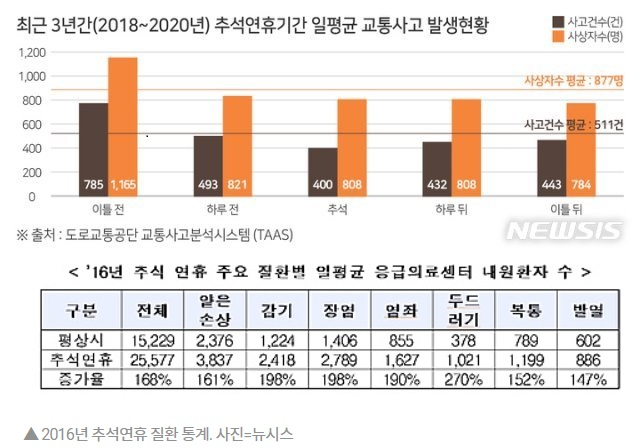

In [ ]:
# HOLIDAY 컬럼 추가 
KR_holidays = pytimekr.holidays(year=2021) # 2021년 휴가 일자 
hol_list = []

# 공휴일 추가 
for KH in sorted(KR_holidays):
  KH = str(pd.to_datetime(KH, format='%Y-%m-%d')).split()[0]
  hol_list.append(KH)

# 2021년도 대체공휴일 추가
Replaced_holidays = ["2021-08-16", "2021-10-04", "2021-10-11"]
for RH in Replaced_holidays:
  hol_list.append(RH)

# 공휴일 : 1 / 평일 : 0
hol_df = pd.DataFrame(columns=['YMD','HOLIDAY'])
hol_df['YMD'] = sorted(hol_list)
hol_df['HOLIDAY'] = 1
hol_df.rename(columns = {'YMD' : 'OCRN_YMD'}, inplace=True)

In [ ]:
hol_df["OCRN_YMD"]

0     2021-01-01
1     2021-02-11
2     2021-02-12
3     2021-02-13
4     2021-03-01
5     2021-05-05
6     2021-05-19
7     2021-06-06
8     2021-08-15
9     2021-08-16
10    2021-09-20
11    2021-09-21
12    2021-09-22
13    2021-10-03
14    2021-10-04
15    2021-10-09
16    2021-10-11
17    2021-12-25
Name: OCRN_YMD, dtype: object

In [ ]:
# 공휴일 DF 합치기
data_DF = pd.merge(data_DF, hol_df, on=['OCRN_YMD'], how='left').fillna(0)

##### 12월 데이터 누락으로 행 삭제

In [ ]:
# 12월 데이터 누락 데이터 확인 
data_DF[data_DF["MONTH"] == 12].sum(axis=0)[4:49]

M00                          0.0
M10                          0.0
M15                          0.0
M20                          0.0
M25                          0.0
M30                          0.0
M35                          0.0
M40                          0.0
M45                          0.0
M50                          0.0
M55                          0.0
M60                          0.0
M65                          0.0
M70                          0.0
F00                          0.0
F10                          0.0
F15                          0.0
F20                          0.0
F25                          0.0
F30                          0.0
F35                          0.0
F40                          0.0
F45                          0.0
F50                          0.0
F55                          0.0
F60                          0.0
F65                          0.0
F70                          0.0
MCHN_ACDNT_OCRN_CNT          0.0
ETC_OCRN_CNT                 0.0
BLTRM_OCRN

In [ ]:
# 12월 행 삭제
drop_index_12 = data_DF[data_DF["MONTH"] == 12].index
data_DF = data_DF.drop(index = drop_index_12, axis=1).reset_index(drop=True)
data_DF.tail()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,LACRTWND_OCRN_CNT,MTRCYC_ACDNT_OCRN_CNT,DRV_ACDNT_OCRN_CNT,BCYC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,FALLING_OCRN_CNT,MONTH,DAY,WEEKDAY,HOLIDAY
153420,418518,418475,518475,2021-11-25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,25,3,0.0
153421,418518,418475,518475,2021-11-26,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,26,4,0.0
153422,418518,418475,518475,2021-11-27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,27,5,0.0
153423,418518,418475,518475,2021-11-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,28,6,0.0
153424,418518,418475,518475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,29,0,0.0


##### 계절 컬럼 추가

계절과 사고의 연관성을 확인하기 위하여 컬럼 추가

> 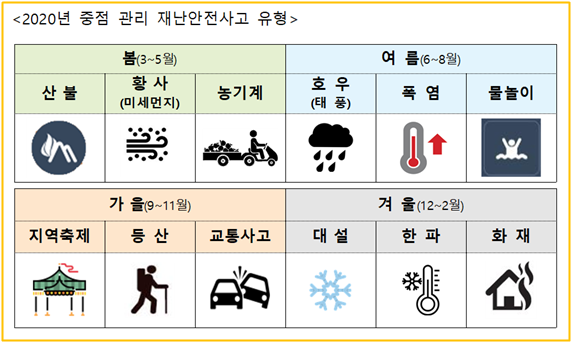

In [ ]:
# 계절정보 컬럼 추가
# 봄 : 3월,4월,5월, 여름 : 6월,7월,8월, 가을 : 9월,10월,11월, 겨울 : 12월,1월,2월
def season_check(x):
    if x in [3, 4, 5]:
        season = 1 # 봄 : 1
    elif x in [6, 7, 8]:
        season = 2 # 여름 : 2
    elif x in [9, 10, 11]:
        season = 3 # 가을 : 3
    elif x in [12, 1, 2]:
        season = 4 # 겨울 : 4
    return season

data_DF['SEASON_SE_NM'] = data_DF['MONTH'].apply(season_check)